In [1]:
from pylab import *
from geometry import Geometry
from detector import Detector
import time

altitude_km     = 100.
num_particles   = 1000
log10_energy_eV = 20.

f_lo   = 30. 
f_hi   = 300.
h_ant  = 1.0 #1.0, 1.5 and 2.0 for now. Need more nec runs, which are cheap.
theta_inc_cut_deg = 39. # arbitrary for now. 
FE_type = 0 # transformer
ZL      = 50.
T_amp   = 60. 
impedance_ratio = 4. # 4:1 turn ratio

srt = time.time()
geom = Geometry(altitude = altitude_km, 
                num_events=num_particles,
                proton_log10_energy = log10_energy_eV
                )
end = time.time()
print 'time:', end-srt

det = Detector(geom, 
               freq_lo         = f_lo, 
               freq_hi         = f_hi, 
               h_ant           = h_ant, 
               th_inc_cut_deg  = theta_inc_cut_deg, 
               FE_type         = FE_type, 
               ZL              = ZL, 
               T_amp           = T_amp, 
               impedance_ratio = impedance_ratio
               )


initializing lunar regolith parameters
time: 1.14843392372
dipole file name: dipole_data_1m.txt
Calculating transformed impedance


0.870797706956
0.870786477841
0.870786521767
2.46508863055e-06


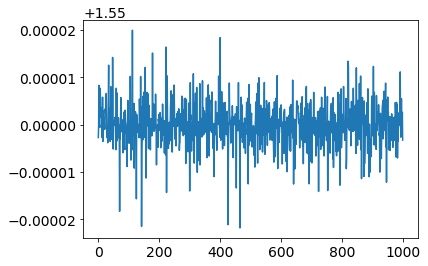

In [11]:
res = geom.snell_residual - geom.n_reg 
plot(geom.snell_residual)
print np.max(np.abs(geom.snell_residual/1.78))
print np.mean(geom.snell_residual/1.78)
print np.median(geom.snell_residual/1.78)
print np.std(geom.snell_residual/1.78)


In [3]:
eff = float(np.sum(det.trig))/float(geom.num_events)
#eff  = trigger_eff(geom, log10_Energy_eV, f_lo, f_hi, df, h_ant = 1.0, a_ant=1.e-3, ZL = 1.e6)
print 'np.sum(det.trig)    ', np.sum(det.trig)
print 'geom.AOmega_0 * eff %1.2e'%(geom.AOmega_0 * eff)

np.sum(det.trig)     36
geom.AOmega_0 * eff 1.17e+05


36


(array([ 2.,  2.,  5.,  6.,  3.,  5.,  3.,  1.,  5.,  4.]),
 array([ 0.03191972,  0.10351596,  0.17511219,  0.24670842,  0.31830465,
         0.38990088,  0.46149712,  0.53309335,  0.60468958,  0.67628581,
         0.74788205]),
 <a list of 10 Patch objects>)

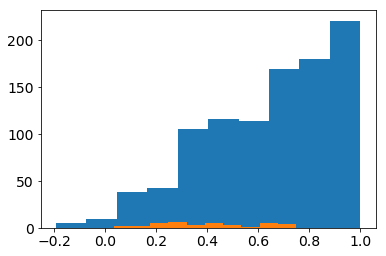

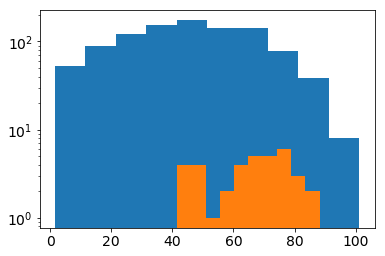

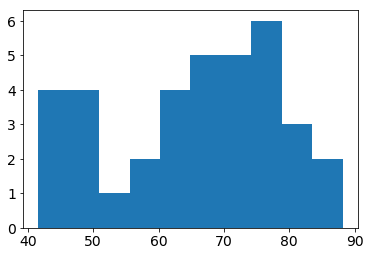

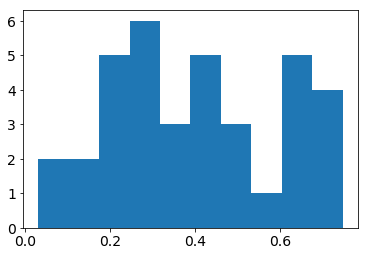

In [4]:
print np.sum(det.trig)
rcParams['font.size']=14
figure()
hist(geom.r_CR[2])
hist(geom.r_CR[2][det.trig])
figure()
th = np.arccos(geom.r_CR[2])
hist(th*180./pi, log=True)
hist(th[det.trig]*180./pi, log=True)
figure()
hist(th[det.trig]*180./pi)
figure()
hist(geom.r_CR[2][det.trig])

In [5]:
ir = np.random.randint(int(np.sum(det.trig)))
print np.where(det.trig==True)[0][ir]
ev = np.where(det.trig==True)[0][ir]
print ev
print det.trig[ev]

print det.V_pk[:,ev]/det.V_rms
# get distance


394
394
True
[ 0.7496519   6.71631573 -8.39582603]


In [6]:
'''
I want a function where I feed geometric parameters and out comes my answer on the voltage.
> This probably means I have to restructure my code to separate forward modeling functions that 
> I can use in my reconstructions.
'''
'''GEOMETRY'''
density
n_ref
cos_th_M
r_M # entry point on the Moon.
# cosmic ray direction
cos_th_CR
phi_CR
 #derived> kx, ky, kz, refraction etc. The rest is derived.
    
''' Detector '''

NameError: name 'density' is not defined

In [ ]:
bins = np.arange(0., 90.1, 1.)
h, b = np.histogram(th[det.trig]*180./pi, bins)

u = (np.cumsum(np.ones(len(th[det.trig])))-1.)/(float(len(th[det.trig]))-1.)
plot(np.sort(th[det.trig]*180./pi), u)



In [ ]:
eff = float(np.sum(det.trig))/float(geom.num_events)
#eff  = trigger_eff(geom, log10_Energy_eV, f_lo, f_hi, df, h_ant = 1.0, a_ant=1.e-3, ZL = 1.e6)
print '%1.1f %1.1f %d %1.2e %1.2e'%(altitude_km, log10_energy_eV, np.sum(det.trig), eff, geom.AOmega_0 * eff)
AOm = geom.AOmega_0 * eff

In [ ]:
rcParams['font.size']=16
from scipy.interpolate import interp1d
f_el = interp1d(u, np.sort(th[det.trig]))
'''
Sample altitude
'''
N = 1000000
u1 = np.random.uniform(0., 1., N)
alt = pi/2. - f_el(u1)
az = np.random.uniform(0.,2.*pi, N)

hist(alt*180./pi)
xlabel('altitude angle, deg')

orb_inc = 30. * pi/180.

bins = np.arange(-91., 91.1, 1.)

lat = orb_inc*np.sin(np.random.uniform(-pi/2., pi/2., N))
sin_dec = np.sin(lat)*np.sin(alt) + np.cos(lat)*np.cos(alt)*np.cos(az)

figure()
hist(lat*180./pi, bins=bins)
xticks(np.arange(-90., 91., 30.))
figure()
hist(np.arcsin(sin_dec)*180./pi, bins=bins)
xticks(np.arange(-90., 91., 30.))

figure(2001, figsize=(8,5))
figure(2002, figsize=(8,5))
cc=0
for orb_inc in np.array([0., 45., 90.])*pi/180.:
    cc+=1
    lat = orb_inc*np.sin(np.random.uniform(-1., 1., N))
    sin_dec = np.sin(lat)*np.sin(alt) + np.cos(lat)*np.cos(alt)*np.cos(az)
    figure(2001)
    h,b =  np.histogram(np.arcsin(sin_dec)*180./pi, bins=bins)
    h = h.astype(float)/float(np.mean(h))*AOm/4./pi*2.
    semilogy(b[1:], h, drawstyle='steps-mid', lw=cc, label='$%1.0f^\circ$'%(orb_inc*180./pi))
    #hist(np.arcsin(sin_dec)*180./pi, bins=bins, alpha=0.5)
    figure(2002)
    h,b =  np.histogram(sin_dec, bins=np.arange(-1.1, 1.101, 0.01))
    h = h.astype(float)/float(np.mean(h))*AOm/4./pi*2.
    semilogy(b[1:], h, drawstyle='steps-mid', lw=cc, label='$%1.0f^\circ$'%(orb_inc*180./pi))
    #hist(sin_dec, bins=np.arange(-1., 1.001, 0.01), alpha=0.5)

figure(2001)
xticks(np.arange(-90., 91., 30.))
xlim(-90., 90.)
y1, y2 = ylim()
ylim(1.e3, y2)

figure(2002)
xticks(np.arange(-1., 1.01, 0.2))
xlim(-1.01, 1.02)
y1, y2 = ylim()
ylim(4.e3, 1.e5)
xlabel('$\sin\delta$')
ylabel(r'$d\mathcal{E}/d\Omega$, km$^2$yr')
legend(loc=8, title='Orb. Inc.')